In [5]:
from collections import Counter
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud
import seaborn as sns
import numpy as np
import pyarabic.araby as araby
import pyarabic.number as number
import nltk
from nltk.stem.isri import ISRIStemmer
import re
import string
from farasa.stemmer import FarasaStemmer
from nltk.stem import ISRIStemmer


# Data Preparing

In [1]:
def extract_tokens_and_labels_from_conll(file_path):
    tokens_labels = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            if line.strip():
                parts = line.split()
                if len(parts) > 1:
                    token = parts[0]
                    label = parts[-1]
                    tokens_labels.append((token, label))
    return tokens_labels

file_path = "split70.conll"
tokens_labels = extract_tokens_and_labels_from_conll(file_path)

output_file_path = "corpus_with_labels.txt"
with open(output_file_path, mode='w', encoding='utf-8') as file:
    for token, label in tokens_labels:
        file.write(f"{token}\t{label}\n")

print(f"Text file saved at: {output_file_path}")


Text file saved at: corpus_with_labels.txt


In [2]:
corpus_path = "corpus_with_labels.txt"
tokens = []
labels = []
with open(corpus_path, 'r', encoding='utf-8') as file:
    for line in file:
        token, label = line.strip().split('\t')
        tokens.append(token)
        labels.append(label)


# Data exploration

In [3]:
print(len(tokens))

390999


In [6]:
# Label counts (excluding "O" label)
label_counts = Counter(label for label in labels if label != "O")
label_counts

Counter({'I-DATE': 39348,
         'B-DATE': 10704,
         'I-NONGOV': 7624,
         'I-GOV': 6681,
         'B-GOV': 5669,
         'B-TOWN': 4907,
         'I-PERS': 4712,
         'B-PERS': 4518,
         'B-NONGOV': 4030,
         'B-OCC': 3717,
         'I-TOWN': 3714,
         'B-NORP': 3585,
         'I-MED': 3374,
         'I-EVENT': 3020,
         'B-MED': 2886,
         'B-ORDINAL': 2739,
         'I-OCC': 2330,
         'B-COUNTRY': 1976,
         'I-NORP': 1878,
         'B-EVENT': 1850,
         'I-STATE-OR-PROVINCE': 1353,
         'I-WEBSITE': 1346,
         'B-CARDINAL': 1291,
         'B-STATE-OR-PROVINCE': 1143,
         'I-LAW': 986,
         'I-BUILDING-OR-GROUNDS': 920,
         'I-CAMP': 784,
         'I-COM': 759,
         'I-EDU': 738,
         'B-BUILDING-OR-GROUNDS': 646,
         'B-CAMP': 595,
         'B-EDU': 440,
         'B-COM': 440,
         'I-REGION-GENERAL': 428,
         'B-WEBSITE': 411,
         'B-LAW': 368,
         'I-CARDINAL': 350,
      

In [7]:
num_unique_labels = len(label_counts.keys())
print("Number of unique labels:", num_unique_labels)

Number of unique labels: 92


# Data exploration/Visualization

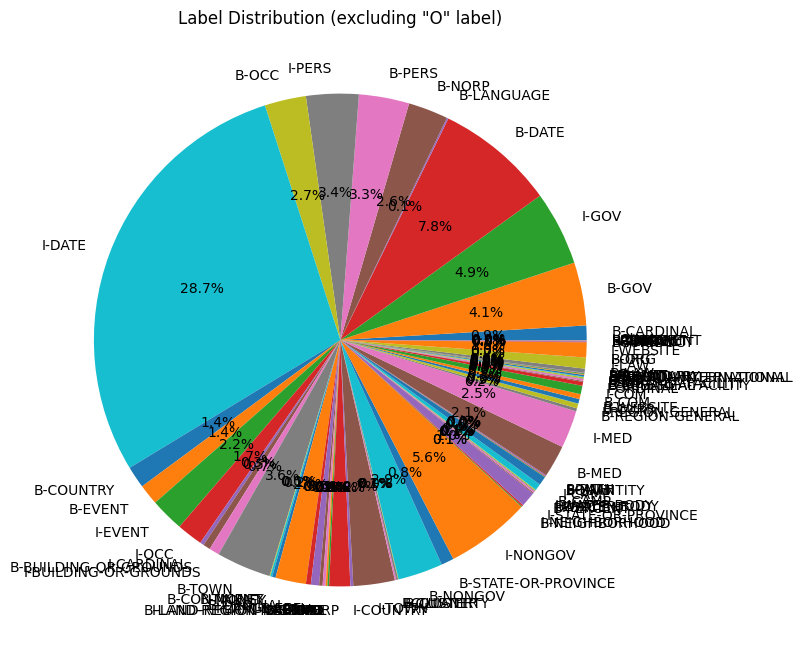

In [8]:
# Label Distribution Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts.values(), labels=label_counts.keys(), autopct='%1.1f%%')
plt.title('Label Distribution (excluding "O" label)')
plt.show()

In [9]:
fig = px.bar(x=label_counts.keys(), y=label_counts.values())
fig.update_layout(title='Distribution of Labels', bargap=0, 
                  xaxis={'categoryorder':'total descending',
                        'ticktext': list(label_counts.keys()),  
                        'tickangle': -45})
fig.update_xaxes(tickfont_size=8)

fig.show()

# Data Preprocessing

In [10]:

unique_embeddings = []
seen = set() 

for sublist in tokens_labels:
  tuple_sublist = str(sublist)
  if tuple_sublist not in seen:
    seen.add(tuple_sublist)
    unique_embeddings.append(sublist)

len(tokens_labels) , len(unique_embeddings)


(390999, 52636)

In [11]:
unique_embeddings #new dataset after removing duplicates

[('بين', 'O'),
 ('الوعي', 'O'),
 ('والّلاوعي', 'O'),
 ('عم', 'O'),
 ('شوف', 'O'),
 ('حلم', 'O'),
 ('وانا', 'O'),
 ('عا', 'O'),
 ('مخدتي', 'O'),
 ('مقلّق', 'O'),
 ('حسيت', 'O'),
 ('اني', 'O'),
 ('راكض', 'O'),
 ('وملهوف', 'O'),
 ('ومن', 'O'),
 ('حول', 'O'),
 ('منك', 'O'),
 ('صار', 'O'),
 ('قلبي', 'O'),
 ('يطوف', 'O'),
 ('وعا', 'O'),
 ('غصون', 'O'),
 ('عمرك', 'O'),
 ('يتسلق', 'O'),
 ('وصاروا', 'O'),
 ('عيونك', 'O'),
 ('كل', 'O'),
 ('ساعه', 'O'),
 ('لون', 'O'),
 ('اسود', 'O'),
 ('اخضر', 'O'),
 ('متل', 'O'),
 ('الكون', 'O'),
 ('احيان', 'O'),
 ('البدر', 'O'),
 ('قاعد', 'O'),
 ('هون', 'O'),
 ('وأحيان', 'O'),
 ('معلق', 'O'),
 ('راح', 'O'),
 ('.', 'O'),
 ('لا', 'O'),
 ('تفزعي', 'O'),
 ('صوب', 'O'),
 ('النهر', 'O'),
 ('روحي', 'O'),
 ('هونيك', 'O'),
 ('ونزفة', 'O'),
 ('جروحي', 'O'),
 ('رح', 'O'),
 ('ضل', 'O'),
 ('شوفك', 'O'),
 ('وين', 'O'),
 ('ما', 'O'),
 ('كنتي', 'O'),
 ('وكلما', 'O'),
 ('التفتت', 'O'),
 ('بتطلعي', 'O'),
 ('انتي', 'O'),
 ('يمكن', 'O'),
 ('لأني', 'O'),
 ('ملبّسك', 'O'),
 ('عنقود'

In [12]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer

# Convert tokens into bag-of-words representation
vectorizer = CountVectorizer()
entity_bow = vectorizer.fit_transform([' '.join(tokens) for tokens in unique_embeddings])

# Apply K-means clustering
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters)
cluster_labels = kmeans.fit_predict(entity_bow)


C:\Users\Salma\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



# Preprocessed Data Visualization

In [12]:
entity_embeddings = {}
for entity in label_counts.keys():
    entity_embeddings[entity] = np.random.rand(5)  


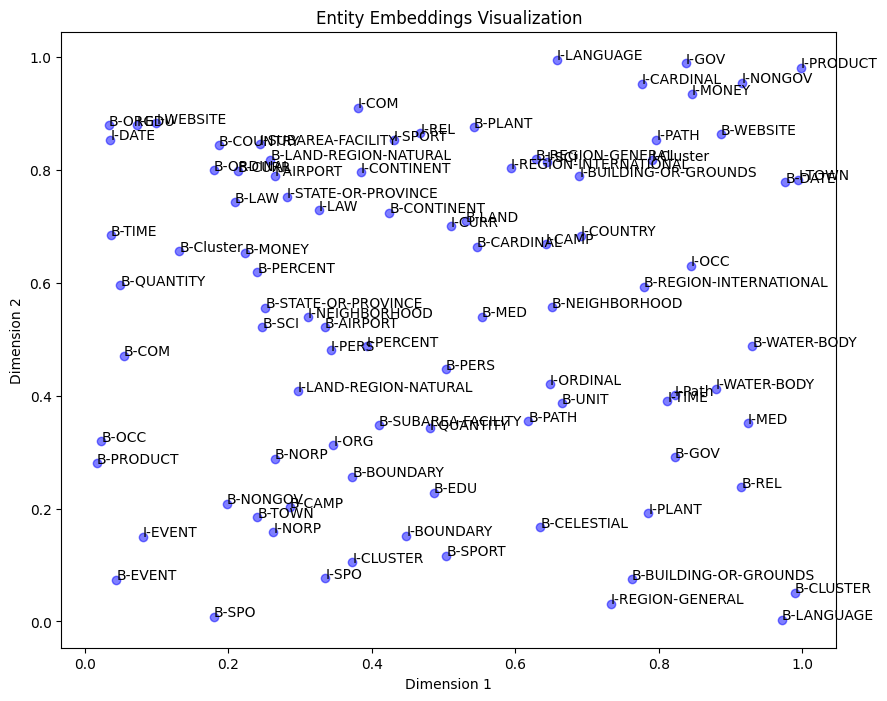

In [13]:
# Extract entities and embeddings
entities = list(entity_embeddings.keys())
embeddings = np.array(list(entity_embeddings.values()))
# Plot
plt.figure(figsize=(10, 8))
plt.scatter(embeddings[:, 0], embeddings[:, 1], c='blue', alpha=0.5)
plt.title('Entity Embeddings Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

# Annotate points with entity names
for i, entity in enumerate(entities):
    plt.annotate(entity, (embeddings[i, 0], embeddings[i, 1]))

plt.show()

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Salma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Removing stop words

In [15]:
arb_stopwords = set(nltk.corpus.stopwords.words("arabic"))#set is better for performance
arb_stopwords.add('إلى')
arb_stopwords.add('علي')
arb_stopwords.add('من')
print(arb_stopwords)

{'هَؤلاء', 'هذان', 'تعسا', 'أي', 'ذين', 'هيا', 'عامة', 'سبعون', 'والذي', 'يوليو', 'ذانِ', 'اللذين', 'عدا', 'رجع', 'إذما', 'دون', 'ماي', 'ثلاث', 'هناك', 'تلكم', 'زعم', 'عدَّ', 'غين', 'ذاك', 'ذ', 'أفعل به', 'خمس', 'أيار', 'ؤ', 'إنَّ', 'ه', 'ثامن', 'ليستا', 'غدا', 'بيد', 'أصلا', 'أمد', 'ثمة', 'تلكما', 'مكانكم', 'إن', 'وإذا', 'نيسان', 'مساء', 'درى', 'نَّ', 'فيما', 'رويدك', 'بمن', 'ذه', 'عليه', 'إليكن', 'د', 'لكي', 'كأيّن', 'حزيران', 'هَاتِي', 'فلا', 'سبعمئة', 'أربعة', 'تموز', 'علق', 'ع', 'ستمائة', 'يفعلون', 'نفس', 'آه', 'شرع', 'أصبح', 'سقى', 'ثمان', 'ذينك', 'بخٍ', 'مه', 'لستن', 'فبراير', 'هيهات', 'أيلول', 'الذين', 'معاذ', 'ذلكما', 'لك', 'سوى', 'خ', 'آمينَ', 'حيث', 'ذان', 'إياهم', 'هذه', 'لكنَّ', 'جير', 'إلَيْكَ', 'ثماني', 'تسعة', 'إليكَ', 'لبيك', 'إليكنّ', 'مذ', 'أنتِ', 'مليم', 'بلى', 'لعلَّ', 'أمامك', 'دولار', 'تِي', 'ذال', 'شيكل', 'لمّا', 'ثلاثمائة', 'عاد', 'هاهنا', 'كِخ', 'كأين', 'ثلاثمئة', 'ذلكن', 'إلى', 'ذا', 'اللتين', 'إليك', 'إي', 'ليس', 'ثلاثة', 'نوفمبر', 'عل', 'إذا', 'أنّى', 'تفعل

In [16]:
unique_embeddings = [emb for emb in unique_embeddings if emb[0] not in arb_stopwords]
print(len(unique_embeddings))#after removing STOP WORDS
   

51912


Remove any non Alphanumeric symbols

In [17]:
unique_embeddings = [(re.sub(r'[^\w]', '', emb[0]), emb[1]) for emb in unique_embeddings]
unique_embeddings = [(text, num) for text, num in unique_embeddings if text]
len(unique_embeddings)

51740

Removing English words

In [18]:
unique_embeddings = [emb for emb in unique_embeddings if all(char not in string.ascii_letters for char in emb[0])]
len(unique_embeddings)

50054

In [19]:
unique_labels =[]
unique_tokens =[]
for i in range(len(unique_embeddings)):
    x = unique_embeddings[i][1]
    y = unique_embeddings[i][0]
    unique_labels.append(x)
    unique_tokens.append(y)

unique_label_counts = Counter(label for label in unique_labels if label != "O")
unique_label_counts

Counter({'I-PERS': 1126,
         'B-PERS': 921,
         'B-NORP': 905,
         'I-EVENT': 674,
         'I-NORP': 659,
         'I-NONGOV': 634,
         'I-GOV': 553,
         'B-ORDINAL': 537,
         'I-DATE': 522,
         'I-TOWN': 449,
         'I-OCC': 430,
         'B-DATE': 424,
         'I-BUILDING-OR-GROUNDS': 419,
         'B-GOV': 385,
         'B-OCC': 363,
         'B-TOWN': 331,
         'B-EVENT': 279,
         'B-CARDINAL': 273,
         'B-NONGOV': 265,
         'I-COM': 251,
         'B-COUNTRY': 208,
         'I-LAW': 175,
         'I-EDU': 157,
         'B-BUILDING-OR-GROUNDS': 142,
         'B-STATE-OR-PROVINCE': 102,
         'I-CAMP': 87,
         'I-TIME': 86,
         'I-LAND-REGION-NATURAL': 86,
         'I-WEBSITE': 85,
         'I-REGION-GENERAL': 81,
         'B-MONEY': 79,
         'I-MED': 79,
         'I-SUBAREA-FACILITY': 79,
         'I-CARDINAL': 76,
         'I-SCI': 66,
         'B-WEBSITE': 65,
         'B-TIME': 64,
         'I-STATE-OR-PROV

Removing Tashkeel and Tatweel

In [20]:
for i in range(len(unique_tokens)):
    unique_tokens[i]=araby.strip_tashkeel(unique_tokens[i])
    unique_tokens[i]=araby.strip_tatweel(unique_tokens[i])


Replacing ALEF_MADDA by ALEF

In [21]:

for i in range(len(unique_tokens)):
    if(araby.ALEF_MADDA in unique_tokens[i]):
        unique_tokens[i]=unique_tokens[i].replace(araby.ALEF_MADDA,"ا")


In [22]:
stemmer = FarasaStemmer()

Removing 'ال' and 'و'and Stemming

In [ ]:
stemmer = FarasaStemmer()
unique_tokens = [(stemmer.stem(token)) for token in unique_tokens]

Lemmatization

In [23]:
lemmatizer = ISRIStemmer()
lemmatized_tokens = [(lemmatizer.suf32(token)) for token in unique_tokens]

Removing repeated letters (more than two letters)

In [24]:
import re

def remove_repeated_letters(text):
    return re.sub(r'(.)\1{2,}', r'\1\1', text)
    
for i, token in enumerate(unique_tokens):
    unique_tokens[i] = remove_repeated_letters(token)


In [ ]:
file_path = 'preprocessed_data.txt'

with open(file_path, 'w', encoding='utf-8') as file:
    for item, item1 in zip(unique_tokens, unique_labels):
        file.write(f"{item}\t")
        file.write(f"{item1}\n")

print('Text file created successfully.')